In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.11.0

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls /content/gdrive/MyDrive/imgs/train/cats_train

10.jpg	12.jpg	14.jpg	16.jpg	18.jpg	1.jpg	2.jpg  4.jpg  6.jpg  8.jpg
11.jpg	13.jpg	15.jpg	17.jpg	19.jpg	20.jpg	3.jpg  5.jpg  7.jpg  9.jpg


In [7]:
import os
# Walk through imgs directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/gdrive/MyDrive/imgs"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}. ")

There are 2 directories and 1 images in /content/gdrive/MyDrive/imgs. 
There are 2 directories and 1 images in /content/gdrive/MyDrive/imgs/test. 
There are 0 directories and 10 images in /content/gdrive/MyDrive/imgs/test/cats_test. 
There are 0 directories and 10 images in /content/gdrive/MyDrive/imgs/test/dogs_test. 
There are 2 directories and 1 images in /content/gdrive/MyDrive/imgs/train. 
There are 0 directories and 20 images in /content/gdrive/MyDrive/imgs/train/dogs_train. 
There are 0 directories and 20 images in /content/gdrive/MyDrive/imgs/train/cats_train. 


In [8]:
# getting the class names
import pathlib 
import numpy as np
data_dir = pathlib.Path("/content/gdrive/MyDrive/imgs/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creates list if class names from subdirectories.
class_names = class_names[1:]
print(class_names)

['cats_train' 'dogs_train']


In [9]:
# Visualizing imgs
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the target directory.
  target_folder = target_dir+target_class

  # getting a random img path.
  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # reading the img and visualizing it.
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}")
  return img

['20.jpg']
image shape: (333, 500, 3)


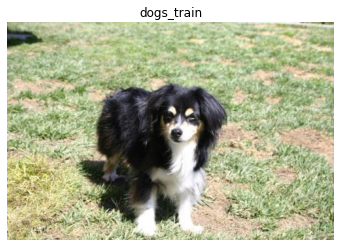

In [10]:
img = view_random_image(target_dir="/content/gdrive/MyDrive/imgs/train/",
                        target_class="dogs_train")

In [11]:
tf.constant(img)

<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[124, 135,  93],
        [135, 146, 103],
        [150, 161, 118],
        ...,
        [120, 126,  82],
        [124, 130,  86],
        [125, 131,  87]],

       [[138, 149, 109],
        [145, 156, 114],
        [155, 166, 124],
        ...,
        [116, 121,  81],
        [123, 128,  88],
        [127, 132,  92]],

       [[149, 159, 122],
        [153, 163, 126],
        [158, 169, 129],
        ...,
        [128, 129,  98],
        [137, 138, 107],
        [143, 144, 113]],

       ...,

       [[203, 195, 148],
        [220, 212, 165],
        [234, 226, 179],
        ...,
        [156, 158, 119],
        [141, 146, 106],
        [160, 165, 125]],

       [[212, 204, 157],
        [216, 208, 159],
        [223, 217, 167],
        ...,
        [146, 151, 111],
        [125, 130,  90],
        [141, 146, 106]],

       [[194, 188, 138],
        [202, 196, 146],
        [208, 202, 150],
        ...,
        [161, 166, 12

In [14]:
# End to end example

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(normalize/scale)
image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = image_generator.flow_from_directory(directory='/content/gdrive/MyDrive/imgs/train',
                                                      target_size=(224,224),
                                                      batch_size=10,
                                                      class_mode='binary',
                                                     seed=42)
val_data_gen = image_generator.flow_from_directory(directory='/content/gdrive/MyDrive/imgs/test',
                                                    target_size=(224,224),
                                                    batch_size=10,
                                                    class_mode='binary',
                                                   seed=42)

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='softmax')
])

# Training the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data_gen, 
                    epochs=300, 
                    steps_per_epoch=len(train_data_gen),
                    validation_data=val_data_gen, 
                    validation_steps=len(val_data_gen))


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/300


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 2.6781 - accuracy: 0.5000

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 2s 215ms/step - loss: 2.6781 - accuracy: 0.5000 - val_loss: 0.8213 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 1s 137ms/step - loss: 0.7915 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 1s 135ms/step - loss: 0.7078 - accuracy: 0.5000 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 132ms/step - loss: 0.7223 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 127ms/step - loss: 0.6849 - accuracy: 0.5000 - val_

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 179776)            0         
                                                                 
 dense_4 (Dense)             (None, 32)               